In [1]:
# importar librerias
import pandas as pd
import numpy as np

In [2]:
# importar datos
original = pd.read_csv("C:/Users/Keven/Documents/Python Scripts/UDSC/Caso Practico 01/DSventa_F.csv")
base = original.copy()

In [3]:
base.head()

,ID,SEXO,EDAD,INGRESOS,ESTADOCIVIL,FLAG_COMPRA
0,10001,M,19.0,1500,S,0
1,10002,M,35.0,1600,C,0
2,10003,F,26.0,3500,C,0
3,10004,F,27.0,4700,C,0
4,10005,M,19.0,6300,S,0


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
ID             400 non-null int64
SEXO           400 non-null object
EDAD           387 non-null float64
INGRESOS       400 non-null int64
ESTADOCIVIL    392 non-null object
FLAG_COMPRA    400 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 18.8+ KB


### Identificar campos con valores nulos

In [5]:
base[["EDAD"]].isnull().sum()

EDAD    13
dtype: int64

In [6]:
base[["ESTADOCIVIL"]].isnull().sum()

ESTADOCIVIL    8
dtype: int64

### Imputar valores nulos

In [7]:
# Edad
base["EDAD"].fillna(round(base["EDAD"].mean(),0) , inplace = True)

In [8]:
base[["EDAD"]].isnull().sum()

EDAD    0
dtype: int64

In [9]:
# Estado Civil
base["ESTADOCIVIL"].value_counts()

S    214
C    125
D     53
Name: ESTADOCIVIL, dtype: int64

In [10]:
base["ESTADOCIVIL"].fillna('S', inplace = True)

In [11]:
base[["ESTADOCIVIL"]].isnull().sum()

ESTADOCIVIL    0
dtype: int64

### Revisión de Outliers

In [12]:
vector_percentiles = [0,10,25,50,75,90,95,99,100]

In [13]:
# Edad
np.nanpercentile(base["EDAD"],vector_percentiles)

array([ 18.,  24.,  30.,  37.,  45.,  52.,  57.,  60.,  60.])

In [14]:
# Ingresos
np.nanpercentile(base["INGRESOS"],vector_percentiles)

array([  1200.,   2100.,   3500.,   5800.,   7300.,  10100.,  11405.,
        48615.,  90000.])

In [15]:
# Reeplazamos por el percil 95
valor_p95 = np.nanpercentile(base["INGRESOS"],95)

In [16]:
base.loc[base["INGRESOS"] > valor_p95 ,"INGRESOS"] = valor_p95

In [17]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
ID             400 non-null int64
SEXO           400 non-null object
EDAD           400 non-null float64
INGRESOS       400 non-null float64
ESTADOCIVIL    400 non-null object
FLAG_COMPRA    400 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 18.8+ KB


### Tranformar Campos  

In [18]:
data = base.copy()

In [19]:
# SEXO
data["SEXO"].unique()

array(['M', 'F'], dtype=object)

In [20]:
diccionario_temp = { 'M': 1 ,'F': 0 }

In [21]:
data["SEXO"] = data["SEXO"].map(diccionario_temp)

In [22]:
# ESTADOCIVIL
data["ESTADOCIVIL"].unique()

array(['S', 'C', 'D'], dtype=object)

In [23]:
# Variable Sin Convertir
data[["ESTADOCIVIL"]].head()

,ESTADOCIVIL
0,S
1,C
2,C
3,C
4,S


In [24]:
# Variable Convertidad a Dummy
pd.get_dummies(data["ESTADOCIVIL"], prefix = 'ESTADOCIVIL', drop_first = True ).head()

,ESTADOCIVIL_D,ESTADOCIVIL_S
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1


In [25]:
# Almacenar nuevos campos 
temp_dummies = pd.get_dummies(data["ESTADOCIVIL"], prefix = 'ESTADOCIVIL', drop_first = True )

In [26]:
data.drop('ESTADOCIVIL', axis = 1, inplace = True)

In [27]:
data = pd.concat([ data, temp_dummies ], axis = 1)

In [28]:
data.head()

,ID,SEXO,EDAD,INGRESOS,FLAG_COMPRA,ESTADOCIVIL_D,ESTADOCIVIL_S
0,10001,1,19.0,1500.0,0,0,1
1,10002,1,35.0,1600.0,0,0,0
2,10003,0,26.0,3500.0,0,0,0
3,10004,0,27.0,4700.0,0,0,0
4,10005,1,19.0,6300.0,0,0,1


## Modeling 

In [29]:
# Separar Training and Test
from sklearn import cross_validation
data_train , data_test = cross_validation.train_test_split(data, train_size = 0.70, random_state = 99)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
data.columns

Index(['ID', 'SEXO', 'EDAD', 'INGRESOS', 'FLAG_COMPRA', 'ESTADOCIVIL_D',
       'ESTADOCIVIL_S'],
      dtype='object')

In [31]:
vars_to_model = ['SEXO', 'EDAD', 'INGRESOS', 'ESTADOCIVIL_D', 'ESTADOCIVIL_S']
target = "FLAG_COMPRA"

In [32]:
# Separar Variables Predictoras y el Target
X_train = data_train[vars_to_model]
y_train = data_train[target]

X_test = data_test[vars_to_model]
y_test = data_test[target]

### Modeling is comming ... 

## Arbol de Decisión

In [33]:
from sklearn import tree
tree.DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
model = tree.DecisionTreeClassifier(random_state = 99, max_depth = 4)

In [35]:
model = model.fit(X_train, y_train)

In [36]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

pred_train_proba = model.predict_proba(X_train)
pred_test_proba = model.predict_proba(X_test)

### Métricas - Training

In [37]:
print("Matriz de Confusión - Train:")
from sklearn import metrics as mt
cm = mt.confusion_matrix(y_train,pred_train)
cm

Matriz de Confusión - Train:


array([[169,   5],
       [ 10,  96]])

In [38]:
accuracy = mt.accuracy_score(y_train,pred_train)
print("Accuracy : ", accuracy)

Accuracy :  0.946428571429


In [39]:
auc = mt.roc_auc_score(y_train ,pred_train_proba[:,1])
print("roc - auc : ", auc)

roc - auc :  0.982379093472


### Métricas - Testing

In [40]:
print("Matriz de Confusión - Test:")
from sklearn import metrics as mt
cm = mt.confusion_matrix(y_test,pred_test)
cm

Matriz de Confusión - Test:


array([[81,  2],
       [ 6, 31]])

In [41]:
accuracy = mt.accuracy_score(y_test,pred_test)
print("Accuracy : ", accuracy) # 0.891666666667

Accuracy :  0.933333333333


In [42]:
auc = mt.roc_auc_score(y_test ,pred_test_proba[:,1])
print("roc - auc : ", auc)

roc - auc :  0.972647346141


In [43]:
y_pred_proba = pred_test_proba

In [46]:
def graficar_roc (y_real, y_pred_prob_1):
    import matplotlib.pyplot as plt
    from sklearn.cross_validation import train_test_split

    fpr, tpr, thresholds  = mt.roc_curve(y_real.astype('int'),y_pred_prob_1, pos_label = 1)

    roc_auc = mt.auc(fpr, tpr)

    print ('ROC AUC: %0.2f' % roc_auc)
    gini_print = (2*roc_auc - 1)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f) \nGini (2*roc_auc - 1) = %0.4f' %(roc_auc,gini_print))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

ROC AUC: 0.97


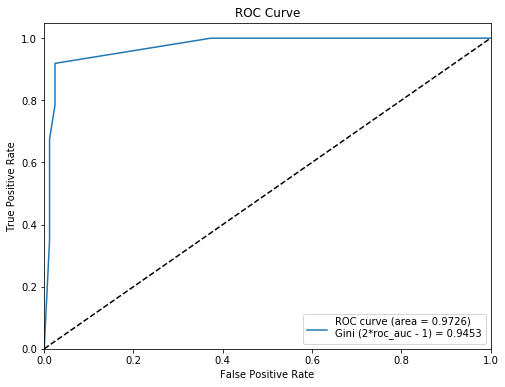

In [47]:
graficar_roc(y_real = y_test, y_pred_prob_1 = pred_test_proba[:,1])

## RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [49]:
model = RandomForestClassifier(n_estimators = 100, random_state = 99, max_depth = 4)

In [50]:
model = model.fit(X_train, y_train)

In [51]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

pred_train_proba = model.predict_proba(X_train)
pred_test_proba = model.predict_proba(X_test)

### Métricas - Training

In [52]:
print("Matriz de Confusión - Train:")
from sklearn import metrics as mt
cm = mt.confusion_matrix(y_train,pred_train)
cm

Matriz de Confusión - Train:


array([[166,   8],
       [  7,  99]])

In [53]:
accuracy = mt.accuracy_score(y_train,pred_train)
print("Accuracy : ", accuracy)

Accuracy :  0.946428571429


In [54]:
auc = mt.roc_auc_score(y_train ,pred_train_proba[:,1])
print("roc - auc : ", auc)

roc - auc :  0.983355020603


### Métricas - Testing

In [55]:
print("Matriz de Confusión - Test:")
from sklearn import metrics as mt
cm = mt.confusion_matrix(y_test,pred_test)
cm

Matriz de Confusión - Test:


array([[81,  2],
       [ 3, 34]])

In [56]:
accuracy = mt.accuracy_score(y_test,pred_test)
print("Accuracy : ", accuracy) # 0.891666666667

Accuracy :  0.958333333333


In [57]:
auc = mt.roc_auc_score(y_test ,pred_test_proba[:,1])
print("roc - auc : ", auc)

roc - auc :  0.973949853468


ROC AUC: 0.97


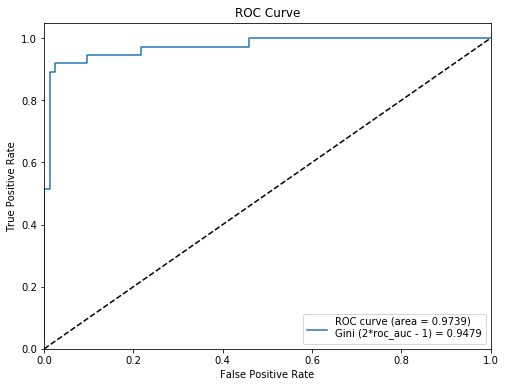

In [58]:
graficar_roc(y_real = y_test, y_pred_prob_1 = pred_test_proba[:,1])